<a href="https://colab.research.google.com/github/snajme/Natural-Language-Processing/blob/main/Gothic_Literature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [17]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
! cp kaggle.json ~/.kaggle/

In [19]:
! chmod 600 ~/.kaggle/kaggle.json

In [20]:
! kaggle datasets list

ref                                                        title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023            47KB  2023-08-26 11:04:57          30555        922  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset         Customer Shopping Trends Dataset           146KB  2023-10-05 06:45:37           3933         97  1.0              
zedataweaver/global-salary-data                            Global Salary Data                           5KB  2023-10-03 00:55:24           1550         42  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023  Credit Card Fraud Detection Dataset 2023   143MB  2023-09-18 10:00:19  

In [21]:
! kaggle datasets download charlesaverill/gothic-literature/

 62% 1.00M/1.61M [00:00<00:00, 2.00MB/s]
100% 1.61M/1.61M [00:00<00:00, 2.89MB/s]


In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
from typing import List
import random
import numpy as np
import pandas as pd
import glob
from nltk import tokenize, download

In [24]:
!unzip /content/gothic-literature.zip

Archive:  /content/gothic-literature.zip
  inflating: castleofotranto.txt     
  inflating: doriangray.txt          
  inflating: dracula.txt             
  inflating: drjekyllmrhyde.txt      
  inflating: frankenstein.txt        
  inflating: janeeyre.txt            
  inflating: phantomoftheopera.txt   
  inflating: wutheringheights.txt    


In [25]:

download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
def split_text(filepath: str, min_char: int = 5) -> List[str]:

    text = str()
    with open(filepath, 'r', encoding='utf8') as file:

        # this seperates by line
        text = file.read().replace('\n', '. ')

        # this replace multiple characters
        text = text.replace('.”', '”.').replace('."', '".').replace('?”', '”?').replace('!”', '”!')
        text = text.replace('--', ' ').replace('. . .', '').replace('_', '')

    sentences = tokenize.sent_tokenize(text)
    sentences = [sentence for sentence in sentences if len(sentence) >= min_char]

    return list(sentences)


In [27]:
# reading the files


phantomoftheopera = []

for path_1 in glob.glob('/content/phantomoftheopera.txt'):
    phantomoftheopera += split_text(path_1)


doriangray = []
for path_2 in glob.glob('/content/doriangray.txt'):
    doriangray += split_text(path_2)



castleofotranto = []
for path_3 in glob.glob('/content/castleofotranto.txt'):
    castleofotranto += split_text(path_3)


In [14]:

text_dictionary = {'phantom_of_the_opera' :  phantomoftheopera , 'dorian_gray': doriangray ,'castle_of_otranto': castleofotranto }

for key in text_dictionary.keys():

    print(key, ':', len(text_dictionary[key]), 'sentences')


phantom_of_the_opera : 0 sentences
dorian_gray : 0 sentences
castle_of_otranto : 0 sentences


In [28]:

# mixing the sentences
np.random.seed(1)

max_len = 10_0000

names = [phantomoftheopera, doriangray, castleofotranto]

combined = []

for name in names:
    name = np.random.choice(name, max_len, replace= True)
    combined += list(name)

print('Length of combo and internally shuffled list:', len(combined))


Length of combo and internally shuffled list: 300000


In [29]:
# this creates a marked list
# At this point, we want to indicate the label of the authors
labels = ['phantomoftheopera'] * max_len + ['doriangray'] * max_len + ['castleofotranto'] * max_len

print('Lnegth of marked list:', len(labels))


Lnegth of marked list: 300000


In [30]:
# lets see if every sentence has a label
len(combined) == len(labels)


True

In [31]:
# here we shuffle the data - sentences
random.seed(3)

zipped = list(zip(combined, labels))

random.shuffle(zipped)

combined, labels = zip(*zipped)

In [32]:
# exporting the resulting dataset
output_data = pd.DataFrame()
output_data['text'] = combined
output_data['author'] = labels


In [33]:
print(output_data.head())
print(output_data.tail())


                                                text             author
0                                         Theodore,.    castleofotranto
1                                   said Manfred.. .    castleofotranto
2  thing for him to do: to hang himself on the ir...  phantomoftheopera
3          priests than by the shrieks of women”.. .    castleofotranto
4   These scruples concurred to make the separation.    castleofotranto
                                                     text             author
299995  the watchet-coloured chamber, on the right han...    castleofotranto
299996  and as soon as I had got rid of the intolerabl...         doriangray
299997  hearts that they flung to and fro, they had to...  phantomoftheopera
299998  unnecessarily and rashly to my father’s resent...    castleofotranto
299999                     You know her curiously shrill.         doriangray


In [34]:
output_data.to_csv('author_data.csv', index=False)


In [35]:
# pre-processing
import string
import time
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer


In [36]:
data = pd.read_csv('author_data.csv', encoding='utf8')
print(data.head())


                                                text             author
0                                         Theodore,.    castleofotranto
1                                   said Manfred.. .    castleofotranto
2  thing for him to do: to hang himself on the ir...  phantomoftheopera
3          priests than by the shrieks of women”.. .    castleofotranto
4   These scruples concurred to make the separation.    castleofotranto


In [37]:
text = list(data['text'].values)
author = list(data['author'].values)

print('Dataset contains {} notes.'.format(len(text)))

Dataset contains 300000 notes.


In [38]:
# data explorations
authors = Counter(author)
authors

Counter({'castleofotranto': 100000,
         'phantomoftheopera': 100000,
         'doriangray': 100000})

In [39]:
#some sentences
np.random.seed(73)
n = len(text)

for _ in range(5):
    print(text[np.random.randint(0, n)])

One can always find them.
"Little more than a boy!"
his precious soul!
for sincerity, I am not tempted to indulge thy vain curiosity farther”.. .
But Mauclair did.


In [40]:
# finding the word count - character count - average length
word_count = np.array([len(sent.split()) for sent in text])
char_count = np.array([len(sent) for sent in text])
average_length = char_count / word_count


In [41]:
# median and percentile  - min and max
# what does the percentile mean here?

def get_stats(var):
    print('\t Min: ', np,min(var))
    print('\t Mmax: ', np.max(var))
    print('\t Average: ', np.mean(var))
    print('\t Median: ', np.median(var))
    print('\t Percentile 1%: ', np.percentile(var, 1))
    print('\t  Percentile 95%: ', np.percentile(var, 95))
    print('\t Percentile 99%: ', np.percentile(var, 99))
    print('\t Percentile 99.5%', np.percentile(var, 99.5))
    print('\t Percentile 99.9%', np.percentile(var, 99.9))


In [42]:
# finding the word count
print('Word count statistics:')
get_stats(word_count)


Word count statistics:
	 Min:  <module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'> 1
	 Mmax:  43
	 Average:  7.79237
	 Median:  7.0
	 Percentile 1%:  1.0
	  Percentile 95%:  14.0
	 Percentile 99%:  22.0
	 Percentile 99.5% 25.0
	 Percentile 99.9% 28.0


<ipython-input-43-43c21b6edc78>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_count, kde=True, bins=80, color='green').set_title('Distribution of word count')


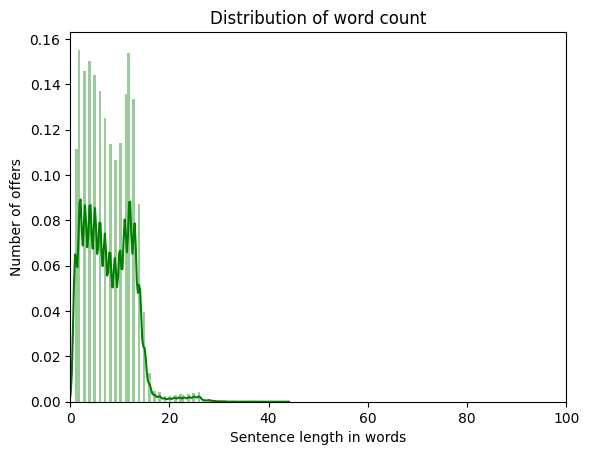

In [43]:
sns.distplot(word_count, kde=True, bins=80, color='green').set_title('Distribution of word count')
plt.xlabel('Sentence length in words')
plt.ylabel('Number of offers')
plt.xlim(0, 100)
plt.savefig('word_count.png')


In [44]:
# now for the characters
print('Character count statistics:')
get_stats(char_count)


Character count statistics:
	 Min:  <module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'> 5
	 Mmax:  212
	 Average:  42.43774666666667
	 Median:  39.0
	 Percentile 1%:  5.0
	  Percentile 95%:  73.0
	 Percentile 99%:  125.0
	 Percentile 99.5% 140.0
	 Percentile 99.9% 146.0


<ipython-input-45-9e3ddbaf74de>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(char_count, kde=True, bins=80, color='red').set_title('Distribution of characters')


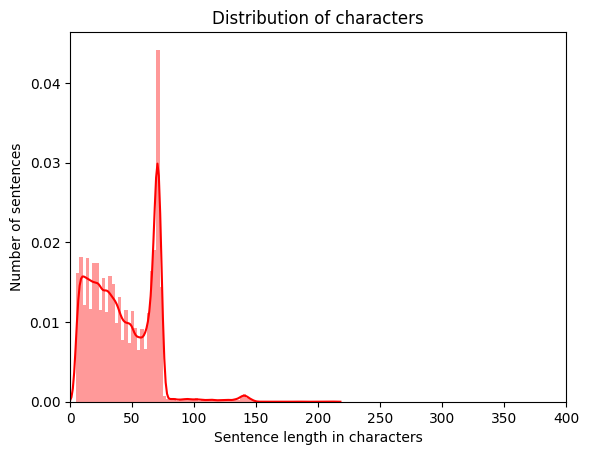

In [45]:
# the distribution of the character count
sns.distplot(char_count, kde=True, bins=80, color='red').set_title('Distribution of characters')
plt.xlabel('Sentence length in characters')
plt.ylabel('Number of sentences')
plt.xlim(0, 400)
plt.savefig('char_count.png')


In [46]:
print('Average lebgth statistics: ')
get_stats(average_length)


Average lebgth statistics: 
	 Min:  <module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'> 2.3333333333333335
	 Mmax:  25.0
	 Average:  5.602337770202805
	 Median:  5.416666666666667
	 Percentile 1%:  3.5
	  Percentile 95%:  7.666666666666667
	 Percentile 99%:  10.0
	 Percentile 99.5% 11.0
	 Percentile 99.9% 14.0


<ipython-input-47-91e828c2aa27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(average_length, kde=True, bins=80, color='purple').set_title('Distribution of average word length')


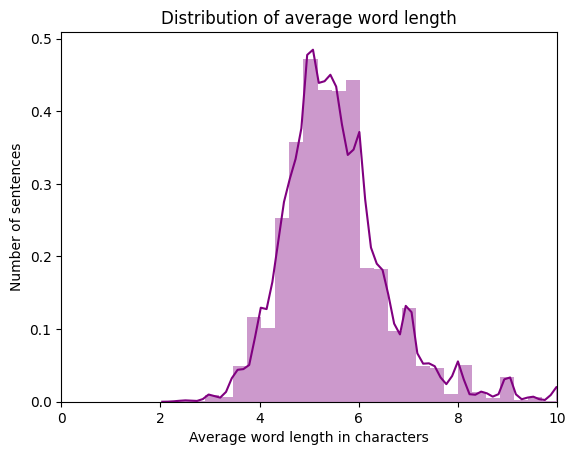

In [47]:
# distribution of the average words
sns.distplot(average_length, kde=True, bins=80, color='purple').set_title('Distribution of average word length')
plt.xlabel('Average word length in characters')
plt.ylabel('Number of sentences')
plt.xlim(0, 10)
plt.savefig('avg_length.png')


In [48]:
author_names = list(authors.keys())
author_names


['castleofotranto', 'phantomoftheopera', 'doriangray']

In [49]:
# this is the outlier in this text data
word_outliers = np.where(word_count > 180)

for i in word_outliers[0][:5]:
    print('Author: {}, Sentence length: {}'.format(author[i], word_count[i]))
    print(text[i], '\n')


In [50]:
max_authors = {author: 0 for author in author_names}

for i in word_outliers[0]:
    max_authors[author[i]] += 1

Counter(max_authors)

#here we did not get the result we wanted!



Counter({'castleofotranto': 0, 'phantomoftheopera': 0, 'doriangray': 0})

In [51]:
# finidng the short sentences
word_outliers = np.where(word_count < 2)

for i in word_outliers[0][:10]:
    print('Sentence length: {}'.format(word_count[i]))
    print(text[i], '\n')


    # same result - this should change

Sentence length: 1
Theodore,. 

Sentence length: 1
fancy. 

Sentence length: 1
Queen. 

Sentence length: 1
interested. 

Sentence length: 1
stage. 

Sentence length: 1
sweetness. 

Sentence length: 1
barbarism. 

Sentence length: 1
pardon. 

Sentence length: 1
cousin. 

Sentence length: 1
truth! 



In [52]:
# fidning the unusual symbols in the text as if we have not found them yet in preprocessing stage

text_string = ''
for sents in text:
    text_string += sents.lower()

char_cnt = Counter(text_string)
print(char_cnt)
print(len(char_cnt), 'unusual symbols in data.')


Counter({' ': 2040584, 'e': 1237887, 't': 900366, 'a': 797620, 'o': 766341, 'i': 695744, 'h': 670507, 'n': 642203, 's': 627273, 'r': 601428, 'd': 457615, 'l': 384055, '.': 380367, 'u': 284570, 'm': 270448, 'c': 234353, 'w': 221954, 'f': 217277, 'y': 206106, 'g': 186799, ',': 176182, 'p': 164859, 'b': 138603, 'v': 96035, 'k': 69971, '"': 59631, '!': 25272, '”': 23290, '“': 22458, "'": 18950, '?': 18631, ';': 16715, '-': 13338, 'x': 13026, 'q': 10383, 'j': 10377, '—': 7537, ':': 7440, '’': 6368, 'z': 4634, '1': 811, '7': 394, '2': 301, '5': 293, '[': 270, ']': 270, ')': 242, '8': 238, '(': 228, '0': 224, '9': 205, '3': 143, '4': 138, '‘': 130, '6': 108, '{': 44, '}': 44, 'ï': 22, 'é': 22})
59 unusual symbols in data.


In [53]:
# listing the characters - what are the unusual characters
print(list(char_cnt.keys()))


['t', 'h', 'e', 'o', 'd', 'r', ',', '.', 's', 'a', 'i', ' ', 'm', 'n', 'f', 'g', ':', 'l', '!', 'p', 'b', 'y', 'k', 'w', '”', 'c', 'u', '"', ';', 'v', 'j', '’', '-', '“', 'z', 'q', "'", '?', '—', ')', 'x', '‘', '5', '[', '1', ']', '(', '0', '7', '6', '2', '3', '8', '9', '4', '{', '}', 'ï', 'é']


In [54]:
# what sentences have unusual characters
accented_characters = ['f', 'u', 'r', 's', 'i', 'c', 'h', '́', 'n', 'd', 'p', 'e', 'a', 't', 'o', 'l', 'x', 'm', 'j', 'é', 'ô', 'v', 'q', 'ê', 'g', 'b', 'k', 'y', 'à', 'і', 'z', 'w', 'è', 'ó', 'ö', '°', 'ç', 'ï', 'á', 'ü', 'ù', 'û', 'î', 'ѣ', 'â']

accented_text = []

for i in range(len(text)):
    for j in text[i]:
        if j in accented_characters:
            accented_text.append(i)


accented_text = list(set(accented_text))

print(len(accented_text), 'sentences contains unusual symbols.')


298426 sentences contains unusual symbols.


In [55]:
for i in accented_text[:10]:
    print('Sentence number {}: '.format(i))
    print(text[i], '\n')


Sentence number 0: 
Theodore,. 

Sentence number 1: 
said Manfred.. . 

Sentence number 2: 
thing for him to do: to hang himself on the iron tree!. 

Sentence number 3: 
priests than by the shrieks of women”.. . 

Sentence number 4: 
These scruples concurred to make the separation. 

Sentence number 5: 
I shall not. 

Sentence number 6: 
"You know he did, Raoul! 

Sentence number 7: 
across to him, and with her little fingers stroked his hair. 

Sentence number 8: 
"We are in a room, a little room; that is what you must keep saying to. 

Sentence number 9: 
I am glad we have found. 



In [56]:
# data preparation - data pre-processing
text = [excerpt.replace('\xa0', '').replace('\x7f', '') for excerpt in text]


In [57]:
# where indentation is happenning
ctr = 0
for excerpt in text:
    if ' ' in excerpt:
        ctr += 1

print(ctr, 'occurance of large blocks of indentation.')


282431 occurance of large blocks of indentation.


In [58]:
new_text = []
for excerpt in text:
    while '  ' in excerpt:
        excerpt = excerpt.replace('  ',' ')
    new_text.append(excerpt)

text = new_text
print(len(text))


300000


In [59]:
normed_text = []

for sent in text:
    new = sent.lower()
    new = new.translate(str.maketrans('','', string.punctuation))
    new = new.replace('“', '').replace('”', '') # english quotes
    new = new.replace('‟', '').replace('”', '') # french quotes
    new = new.replace('«', '').replace('»', '') # christmas tree quotes
    new = new.replace('—', '').replace('–', '') # em dash
    new = new.replace('(', '').replace(')', '')
    new = new.replace('…', '') # ellipsis as one character

    normed_text.append(new)

print(normed_text[0:5])
print(len(normed_text))

['theodore', 'said manfred ', 'thing for him to do to hang himself on the iron tree', 'priests than by the shrieks of women ', 'these scruples concurred to make the separation']
300000


In [60]:
data['text'] = normed_text

data.to_csv('preprocessed_data.csv', index=False)


In [61]:
from typing import List
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelBinarizer


import keras
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, Embedding
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import concatenate
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from keras.callbacks import ModelCheckpoint
from scipy import stats


In [62]:
data = pd.read_csv("preprocessed_data.csv", encoding='utf8')
print(data.head())


                                                text             author
0                                           theodore    castleofotranto
1                                      said manfred     castleofotranto
2  thing for him to do to hang himself on the iro...  phantomoftheopera
3              priests than by the shrieks of women     castleofotranto
4    these scruples concurred to make the separation    castleofotranto


In [63]:

normed_text = list(data['text'])
author = list(data['author'])

authors_names = list(Counter(author).keys())
authors_count = len(authors_names)

normed_text = [str(i) for i in normed_text]


In [64]:
# helper functions - this for the confusion matrix

def plot_confusion_matrix(cm, classes: List[str], normalize: bool = False, title: str = 'Confusion matrix', cmap = plt.cm.Greens):

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

      print('Normalized confusion matrix')

    else:

      print('Unormalized confusion matrix')

    print(cm)

    df_cm = pd.DataFrame(cm, index= classes, columns = classes)

    sns.heatmap(df_cm, annot=True, cmap=cmap)

    plt.ylabel('Right author')

    plt.xlabel('Predicated author')

    plt.title(title)


In [65]:

def plot_history_accuracy(history):

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model\'s accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['teaching data', 'test data'], loc='upper left')



In [66]:

def plot_hsitory_of_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model\'s error')
    plt.ylabel('error')
    plt.xlabel('epochs')
    plt.legend(['teaching data', 'test data'], loc='upper left')


In [67]:
# spliting the data
text_train, text_test, author_train, author_test = train_test_split(normed_text, author, test_size=0.2, random_state=5)


In [68]:
print(np.shape(text_train))
print(np.shape(text_test))
print(np.shape(author_train))
print(np.shape(author_test))


(240000,)
(60000,)
(240000,)
(60000,)


In [69]:
def create_n_grams(excerpt_list: List[str], n:int, vocab_size: int, seq_size: int):

  n_gram_list = []


  for excerpt in excerpt_list:

    excerpt = excerpt.replace(" ", "")

    n_grams = [excerpt[i: i+n] for i in range(len(excerpt) - n + 1)]


    new_string = " ".join(n_grams)

    hot = one_hot(new_string, round(vocab_size * 1.3))

    hot_len = len(hot)

    if hot_len >= seq_size:

      hot = hot[0:seq_size]

    else:

      diff = seq_size - hot_len

      extra = [0]* diff

      hot = hot + extra

    n_gram_list.append(hot)

  n_gram_array = np.array(n_gram_list)

  return n_gram_array




In [70]:
def get_vocab_size(excerpt_list: List[str], n: int, seq_size: int) -> int:
    n_gram_list = []

    for excerpt in excerpt_list:
        excerpt = excerpt.replace(" ", "")

        n_grams = [excerpt[i:i + n] for i in range(len(excerpt) - n + 1)]

        gram_len = len(n_grams)

        if gram_len >= seq_size:

            n_grams = n_grams[0:seq_size]
        else:
            diff = seq_size - gram_len

            extra = [0]*diff

            n_grams = n_grams + extra

        n_gram_list.append(n_grams)

    n_gram_list = list(np.array(n_gram_list).flat)

    n_gram_cnt = Counter(n_gram_list)
    vocab_size = len(n_gram_cnt)

    return vocab_size

In [71]:
vocab_sizes = []
for i in range(1, 4):
    vocab_sizes.append(get_vocab_size(text_train, i, 50))
    print('Size for n =', i, 'is:', vocab_sizes[i - 1])


Size for n = 1 is: 40
Size for n = 2 is: 755
Size for n = 3 is: 7095


In [72]:
gram1_train = create_n_grams(text_train, 1, vocab_sizes[0], 50)
gram2_train = create_n_grams(text_train, 2, vocab_sizes[1], 50)
gram3_train = create_n_grams(text_train, 3, vocab_sizes[2], 50)


In [73]:
gram1_test = create_n_grams(text_test, 1, vocab_sizes[0], 50)
gram2_test = create_n_grams(text_test, 2, vocab_sizes[1], 50)
gram3_test = create_n_grams(text_test, 3, vocab_sizes[2], 50)


In [74]:
print(np.shape(gram1_train))
print(np.shape(gram2_train))
print(np.shape(gram3_train))

print(np.shape(gram1_test))
print(np.shape(gram2_test))
print(np.shape(gram3_test))


(240000, 50)
(240000, 50)
(240000, 50)
(60000, 50)
(60000, 50)
(60000, 50)


In [75]:
max_1gram = np.max(gram1_train)
max_2gram = np.max(gram2_train)
max_3gram = np.max(gram2_train)

print('Max value for 1-gramms: ', max_1gram)
print('Max value for bigramms: ', max_2gram)
print('Max value for trigramms: ', max_3gram)


Max value for 1-gramms:  51
Max value for bigramms:  981
Max value for trigramms:  981


In [76]:
# vectorization
preprocessed_train = text_train
preprocessed_test = text_test

print(preprocessed_train[0:5])

['edition of the globe that i picked up at the club', 'was dead', 'but frederic your lord is', 'offended you', 'we women as some']


In [77]:

vectorizer = TfidfVectorizer(strip_accents='unicode', min_df=6)
vectorizer.fit(preprocessed_train)

print('Dictionary size: ', len(vectorizer.vocabulary_))

word_train = vectorizer.transform(preprocessed_train)
word_test = vectorizer.transform(preprocessed_test)


Dictionary size:  11281


In [78]:

author_lb = LabelBinarizer()
author_lb.fit(author_train)

author_train_hot = author_lb.transform(author_train)
author_test_hot = author_lb.transform(author_test)


In [79]:

def define_model(input_len: int, output_size: int, vocab_size : int, embedding_dim: int, verbose: bool = True,
                drop_out_pct: float = 0.25, conv_filters: int = 500, activation_fn: str = 'relu', pool_size: int = 2, learning: float = 0.0001):
    inputs1 = Input(shape=(input_len,))
    embedding1 = Embedding(vocab_size, embedding_dim)(inputs1)
    drop1 = Dropout(drop_out_pct)(embedding1)
    conv1 = Conv1D(filters=conv_filters, kernel_size=3, activation=activation_fn)(drop1)
    pool1 = MaxPooling1D(pool_size=pool_size)(conv1)
    flat1 = Flatten()(pool1)

    inputs2 = Input(shape=(input_len,))
    embedding2 = Embedding(vocab_size, embedding_dim)(inputs2)
    drop2 = Dropout(drop_out_pct)(embedding2)
    conv2 = Conv1D(filters=conv_filters, kernel_size=4, activation=activation_fn)(drop2)
    pool2 = MaxPooling1D(pool_size=pool_size)(conv2)
    flat2 = Flatten()(pool2)

    inputs3 = Input(shape=(input_len,))
    embedding3= Embedding(vocab_size, embedding_dim)(inputs3)
    drop3 = Dropout(drop_out_pct)(embedding3)
    conv3 = Conv1D(filters=conv_filters, kernel_size=5, activation=activation_fn)(drop3)
    pool3 = MaxPooling1D(pool_size=pool_size)(conv3)
    flat3 = Flatten()(pool3)

    merged = concatenate([flat1, flat2, flat3])

    output = Dense(output_size, activation='softmax')(merged)

    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=output)

    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning), metrics=['accuracy'])

    if verbose:
        print(model.summary())

    return model



In [80]:
gram1_model = define_model(50, authors_count, max_1gram + 1, 26)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 50, 26)               1352      ['input_1[0][0]']             
                                                                                              

In [82]:
gram1_model_history = gram1_model.fit([gram1_train, gram1_train, gram1_train], author_train_hot, epochs=10, batch_size=32, verbose=1, validation_split = 0.2)

Epoch 1/10
6000/6000 [==============================] - 464s 77ms/step - loss: 0.7119 - accuracy: 0.6729 - val_loss: 0.4098 - val_accuracy: 0.8422
Epoch 2/10
6000/6000 [==============================] - 402s 67ms/step - loss: 0.4083 - accuracy: 0.8317 - val_loss: 0.2859 - val_accuracy: 0.8910
Epoch 3/10
6000/6000 [==============================] - 397s 66ms/step - loss: 0.3209 - accuracy: 0.8696 - val_loss: 0.1984 - val_accuracy: 0.9264
Epoch 4/10
6000/6000 [==============================] - 411s 68ms/step - loss: 0.2752 - accuracy: 0.8896 - val_loss: 0.1716 - val_accuracy: 0.9367
Epoch 5/10
6000/6000 [==============================] - 400s 67ms/step - loss: 0.2476 - accuracy: 0.9022 - val_loss: 0.1481 - val_accuracy: 0.9456
Epoch 6/10
6000/6000 [==============================] - 403s 67ms/step - loss: 0.2276 - accuracy: 0.9107 - val_loss: 0.1325 - val_accuracy: 0.9531
Epoch 7/10
6000/6000 [==============================] - 384s 64ms/step - loss: 0.2116 - accuracy: 0.9177 - val_loss: 0

In [ ]:
gram2_model = define_model(50, authors_count, max_2gram + 1, 300)

In [ ]:
gram2_model_history = gram2_model.fit([gram2_train, gram2_train, gram2_train], author_train_hot, epochs=10, batch_size=32, verbose=1, validation_split=0.2)